In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import std, absolute
from scipy.stats import pearsonr, linregress

In [4]:
movies = pd.read_csv('fandango_score_comparison.csv')
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


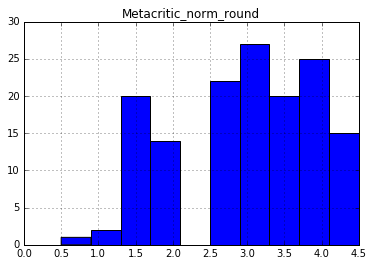

In [5]:
movies.hist('Metacritic_norm_round')
plt.show()

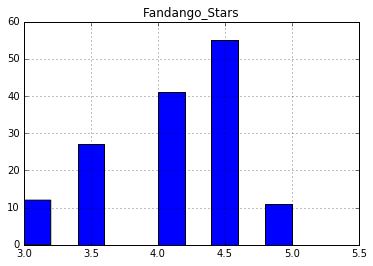

In [7]:
movies.hist('Fandango_Stars')
plt.show()

In [10]:
fs_mean = movies['Fandango_Stars'].mean()
mc_mean = movies['Metacritic_norm_round'].mean()

print(fs_mean, mc_mean)

fs_std = std(movies['Fandango_Stars'])
mc_std = std(movies['Metacritic_norm_round'])

print(fs_std, mc_std)

4.08904109589 2.97260273973
0.53853216127 0.987561029704


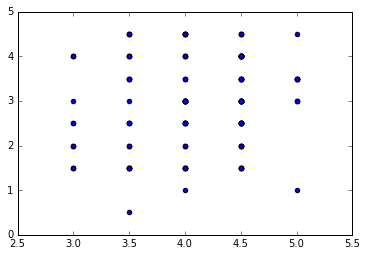

In [11]:
plt.scatter(x=movies['Fandango_Stars'], y=movies['Metacritic_norm_round'])
plt.show()

In [13]:
movies['fm_diff'] = movies['Metacritic_norm_round'] - movies['Fandango_Stars']
movies['fm_diff'] = absolute(movies['fm_diff'])
movies = movies.sort_values(by='fm_diff', ascending=False)
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [15]:
r, p = pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
print(r, p)

0.178449190739 0.0311615162285


In [42]:
slope, intercept, rvalue, pvalue, stderr = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

4.0917071528212041

In [44]:
print(1 * slope + intercept)
print(3 * slope + intercept)
print(5 * slope + intercept)

3.89708499687
4.09170715282
4.28632930877


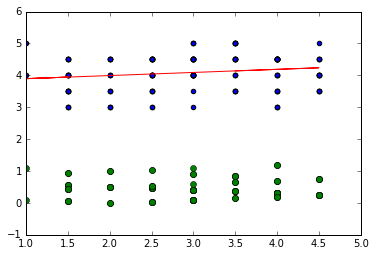

In [58]:
def get_pred(row):
    return slope * row['Metacritic_norm_round'] + intercept

def get_resid(row):
    return abs(row['Fandango_Stars'] - row['pred'])

movies['pred'] = movies.apply(get_pred, axis=1)
movies['resid'] = movies.apply(get_resid, axis=1)

plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.plot(movies['Metacritic_norm_round'], movies['resid'], 'go')
plt.plot(movies['Metacritic_norm_round'], movies['pred'], 'r-')
plt.xlim([1, 5])
plt.ylim([1, 5])
plt.show()